# **Import Libery & Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time

import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 13.1 MB/s eta 0:00:00


In [5]:
dataset = pd.read_excel('/content/drive/MyDrive/thesis/dataset/UBMEC Corpus_Sakib(updated).xlsx')

dataset.head()

,text,classes
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,joy
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,surprise
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",joy
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",joy
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,surprise


In [6]:
len(dataset.text.value_counts())



13007

In [7]:
dataset.shape

(13436, 2)

In [8]:
dataset.dropna()

,text,classes
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,joy
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,surprise
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",joy
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",joy
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,surprise
...,...,...
13431,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,joy
13432,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,joy
13433,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy
13434,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy


In [9]:
dataset.shape

(13436, 2)

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['encoded_classes'] = encoder.fit_transform(dataset['classes'])
dataset.head()

,text,classes,encoded_classes
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,joy,3
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,surprise,5
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",joy,3
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",joy,3
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,surprise,5


In [11]:
train_texts = dataset['text'].astype(str).values.tolist()

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(dataset['text'], dataset['encoded_classes'], test_size = 0.2,random_state=42)

In [13]:
xtrain = xtrain.astype(str).values.tolist()
xtest = xtest.astype(str).values.tolist()

In [14]:
!pip install torch
import torch

In [15]:
from torch.utils.data import TensorDataset

# **Roberta**

In [16]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

In [17]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Max length:  5752


In [18]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [19]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [20]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [21]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [23]:
checkpoint="cardiffnlp/twitter-roberta-base-emotion"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-emotion were not used when initializing RobertaModel: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emotion and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [24]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [25]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=128;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [26]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 30
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


2520


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.7481634474935985


Epoch 1:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.7090261351494562


Epoch 2:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.6700981301920754


Epoch 3:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.6357090260301317


Epoch 4:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 4
Training loss: 1.6073803844906034


Epoch 5:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 5
Training loss: 1.573893863530386


Epoch 6:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 6
Training loss: 1.5318075304939633


Epoch 7:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 7
Training loss: 1.4948733420599074


Epoch 8:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 8
Training loss: 1.468134492635727


Epoch 9:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 9
Training loss: 1.4383817343484788


Epoch 10:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 10
Training loss: 1.4029728287742251


Epoch 11:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 11
Training loss: 1.3746522182510013


Epoch 12:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 12
Training loss: 1.3413388090474265


Epoch 13:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 13
Training loss: 1.3111017289615812


Epoch 14:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 14
Training loss: 1.283787725936799


Epoch 15:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 15
Training loss: 1.2515741842133659


Epoch 16:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 16
Training loss: 1.2259703704289027


Epoch 17:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 17
Training loss: 1.2018488503637768


Epoch 18:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 18
Training loss: 1.172705841915948


Epoch 19:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 19
Training loss: 1.1491567911136717


Epoch 20:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 20
Training loss: 1.119428086848486


Epoch 21:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 21
Training loss: 1.091426288797742


Epoch 22:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 22
Training loss: 1.083211871130126


Epoch 23:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 23
Training loss: 1.0560021230152674


Epoch 24:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 24
Training loss: 1.0230350011870974


Epoch 25:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 25
Training loss: 1.0106514145930607


Epoch 26:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 26
Training loss: 1.0015980218138014


Epoch 27:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 27
Training loss: 0.9891786646275293


Epoch 28:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 28
Training loss: 0.9788321554660797


Epoch 29:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 29
Training loss: 0.9781488520758492


In [28]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [29]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [30]:
val_loss, roberta_predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(roberta_predictions, true_vals)

In [31]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  1.951926350593567
Val F1 =  0.37501835887039664


In [32]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in roberta_predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [33]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.38392857142857145


In [34]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

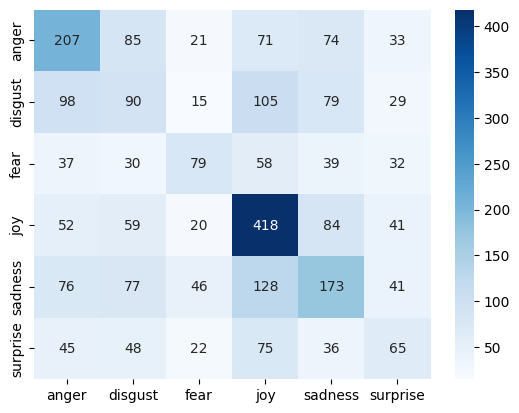

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Blues", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

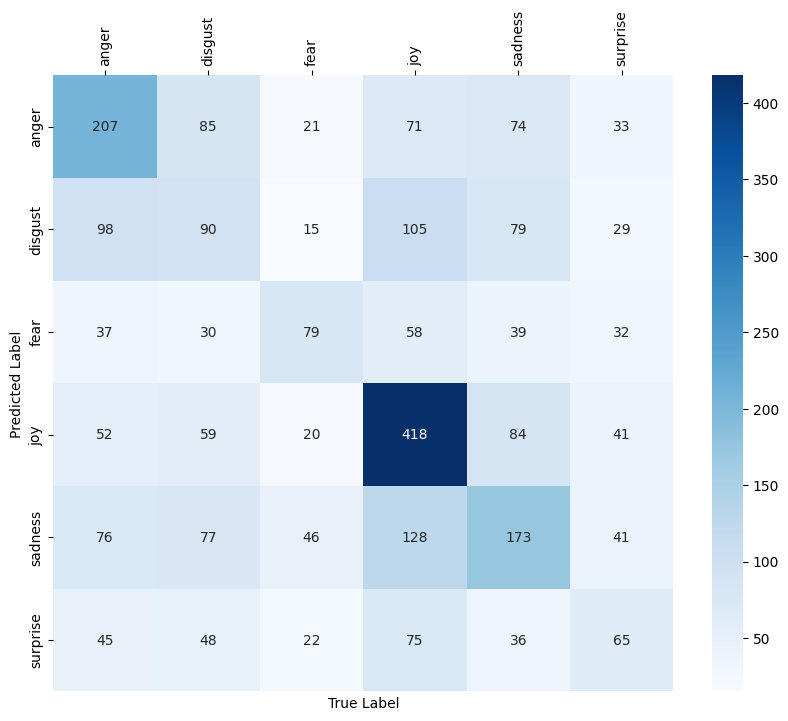

In [36]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [37]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,40.19,42.16,41.15,491.000000
disgust,23.14,21.63,22.36,416.000000
fear,38.92,28.73,33.05,275.000000
joy,48.89,62.02,54.68,674.000000
sadness,35.67,31.98,33.72,541.000000
surprise,26.97,22.34,24.44,291.000000
accuracy,38.39,38.39,38.39,0.383929
macro avg,35.63,34.81,34.90,2688.000000
weighted avg,37.26,38.39,37.50,2688.000000


# **mBERT**

In [38]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

In [39]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (725 > 512). Running this sequence through the model will result in indexing errors


Max length:  1459


In [40]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [41]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [42]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [43]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [44]:
checkpoint="bert-base-multilingual-cased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [45]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [46]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=128;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [47]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


1680


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [48]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.5895880602654957


Epoch 1:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.3415082153819857


Epoch 2:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.1696342024065198


Epoch 3:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.02420179049174


Epoch 4:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.8748739532061985


Epoch 5:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.7641871571540833


Epoch 6:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.6252720799474489


Epoch 7:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.5254041116152491


Epoch 8:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.439333024479094


Epoch 9:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.3534245395234653


Epoch 10:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.29711941505471867


Epoch 11:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.24872424870374657


Epoch 12:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.21190279136810983


Epoch 13:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.1843067445747909


Epoch 14:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.15173260681331158


Epoch 15:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.1405094572830768


Epoch 16:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.12207543118191617


Epoch 17:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.11307555751963741


Epoch 18:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.1015764358675196


Epoch 19:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.09635385720147974


In [49]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [50]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [51]:
val_loss, mBERT_predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(mBERT_predictions, true_vals)

In [52]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  2.4347732975369407
Val F1 =  0.500788264947433


In [53]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in mBERT_predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [54]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.5040922619047619


In [55]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

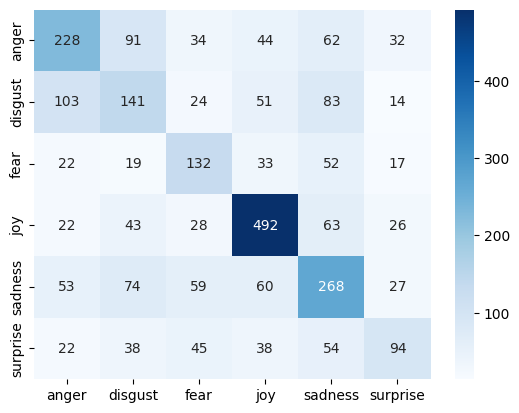

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Blues", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

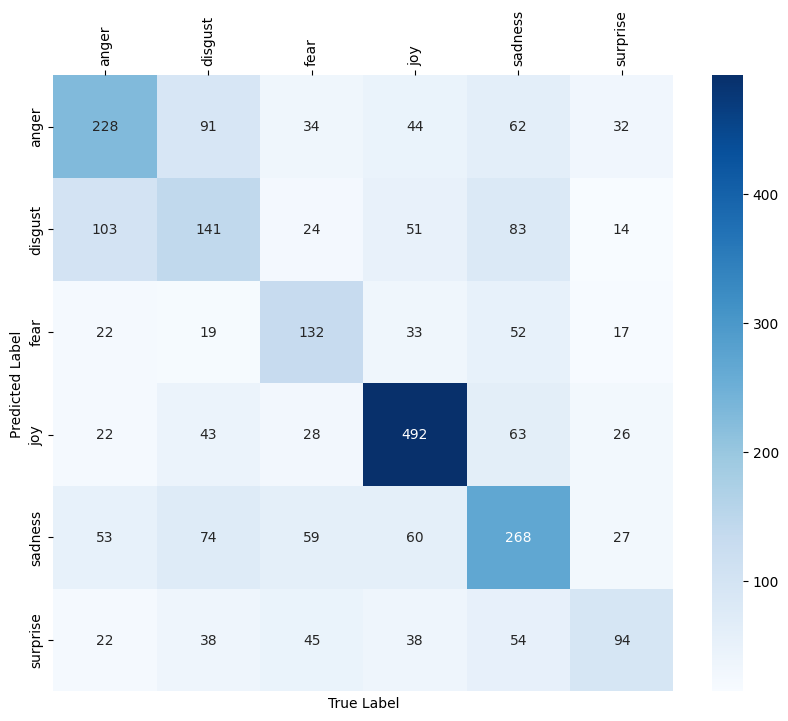

In [57]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [58]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,50.67,46.44,48.46,491.000000
disgust,34.73,33.89,34.31,416.000000
fear,40.99,48.00,44.22,275.000000
joy,68.52,73.00,70.69,674.000000
sadness,46.05,49.54,47.73,541.000000
surprise,44.76,32.30,37.52,291.000000
accuracy,50.41,50.41,50.41,0.504092
macro avg,47.62,47.19,47.16,2688.000000
weighted avg,50.12,50.41,50.08,2688.000000


# **distilBERT**

In [59]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [60]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (1394 > 512). Running this sequence through the model will result in indexing errors


Max length:  2285


In [61]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [62]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [63]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [64]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [65]:
checkpoint="distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [66]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.transformer.layer.0.attention.q_lin.weight True
model.transformer.layer.0.attention.q_lin.bias True
model.transformer.layer.0.attention.k_lin.weight True
model.transformer.layer.0.attention.k_lin.bias True
model.transformer.layer.0.attention.v_lin.weight True
model.transformer.layer.0.attention.v_lin.bias True
model.transformer.layer.0.attention.out_lin.weight True
model.transformer.layer.0.attention.out_lin.bias True
model.transformer.layer.0.sa_layer_norm.weight True
model.transformer.layer.0.sa_layer_norm.bias True
model.transformer.layer.0.ffn.lin1.weight True
model.transformer.layer.0.ffn.lin1.bias True
model.transformer.layer.0.ffn.lin2.weight True
model.transformer.layer.0.ffn.lin2.bias True
model.transformer.layer.0.output_layer_norm.weight True
model.transformer.layer.0.output_layer_norm.bias True
model.

In [67]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=128;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [68]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


1680


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [69]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.7059224404039837


Epoch 1:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.6135968764623005


Epoch 2:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.534387279124487


Epoch 3:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.4577499670641763


Epoch 4:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 4
Training loss: 1.4081728898343586


Epoch 5:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 5
Training loss: 1.360806981722514


Epoch 6:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 6
Training loss: 1.30994656256267


Epoch 7:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 7
Training loss: 1.2621466787088484


Epoch 8:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 8
Training loss: 1.2145221332708995


Epoch 9:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 9
Training loss: 1.161759703641846


Epoch 10:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 10
Training loss: 1.1147479116916656


Epoch 11:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 11
Training loss: 1.0747695494265783


Epoch 12:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 12
Training loss: 1.0449223972502208


Epoch 13:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 13
Training loss: 1.0077148782355445


Epoch 14:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.9627807551906222


Epoch 15:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.9433318142380033


Epoch 16:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.9220435896090099


Epoch 17:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.8985884054785683


Epoch 18:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.891730126880464


Epoch 19:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.88118462903159


In [70]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [71]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [72]:
val_loss, distil_predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(distil_predictions, true_vals)

In [73]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  1.5739163500922067
Val F1 =  0.43635385761613965


In [74]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in distil_predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [75]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.44308035714285715


In [76]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

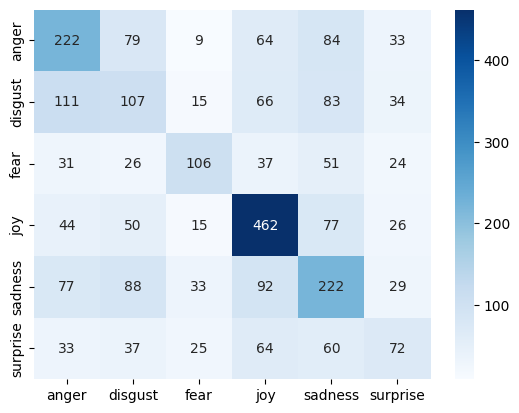

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Blues", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

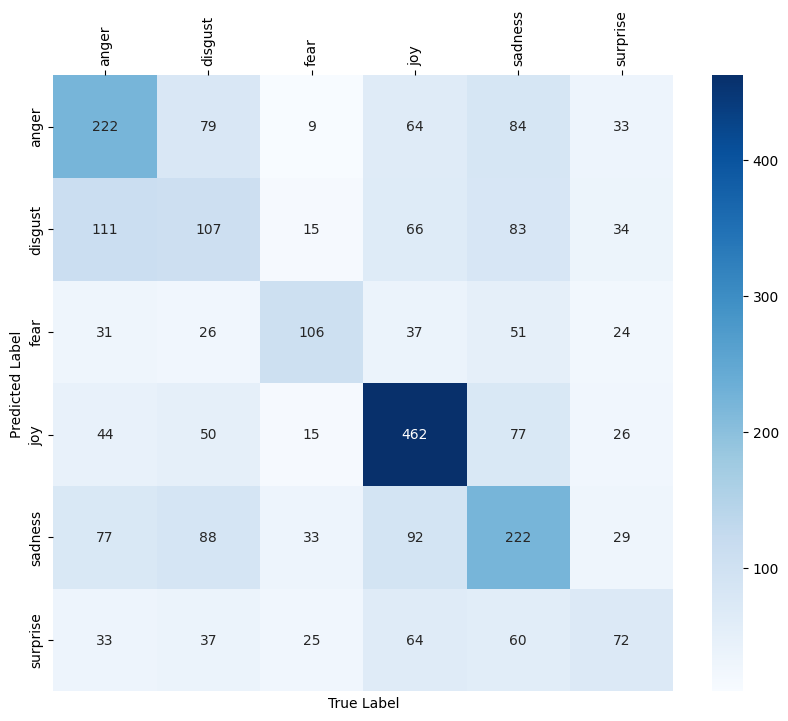

In [78]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [79]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,42.86,45.21,44.00,491.00000
disgust,27.65,25.72,26.65,416.00000
fear,52.22,38.55,44.35,275.00000
joy,58.85,68.55,63.33,674.00000
sadness,38.47,41.04,39.71,541.00000
surprise,33.03,24.74,28.29,291.00000
accuracy,44.31,44.31,44.31,0.44308
macro avg,42.18,40.63,41.06,2688.00000
weighted avg,43.53,44.31,43.64,2688.00000


# **BanglaBERT**

In [80]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

In [81]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Max length:  1096


In [82]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [83]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [84]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [85]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [86]:
checkpoint="sagorsarker/bangla-bert-base"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [87]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [88]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=128;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [89]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


1680


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [90]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.5044602453708649


Epoch 1:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.195387438649223


Epoch 2:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.9804238811844871


Epoch 3:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.7969649448281243


Epoch 4:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.6087217295453662


Epoch 5:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.4448101297020912


Epoch 6:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.32259577317606836


Epoch 7:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.22501767621863455


Epoch 8:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.1667903841783603


Epoch 9:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.1240350002689021


Epoch 10:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.09629176871939785


Epoch 11:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.07524575632331627


Epoch 12:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.06353072715657097


Epoch 13:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.05749751924581471


Epoch 14:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.047114970140336526


Epoch 15:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.04555610358892452


Epoch 16:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.03889366382333849


Epoch 17:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.03426098773655083


Epoch 18:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.03347753527175103


Epoch 19:   0%|          | 0/84 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.032350533098603286


In [91]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [92]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [93]:
val_loss, bangla_predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(bangla_predictions, true_vals)

In [94]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  2.6354843207768033
Val F1 =  0.5335032014195515


In [95]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in bangla_predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [96]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.5364583333333334


In [97]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

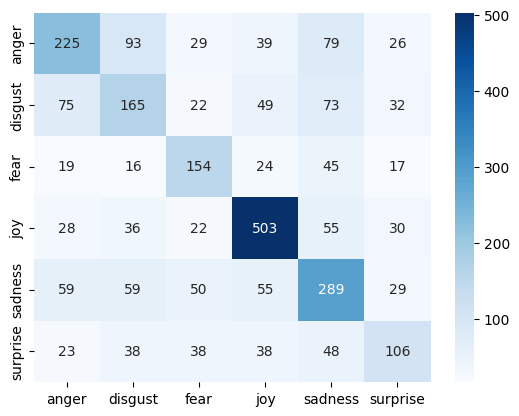

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Blues", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

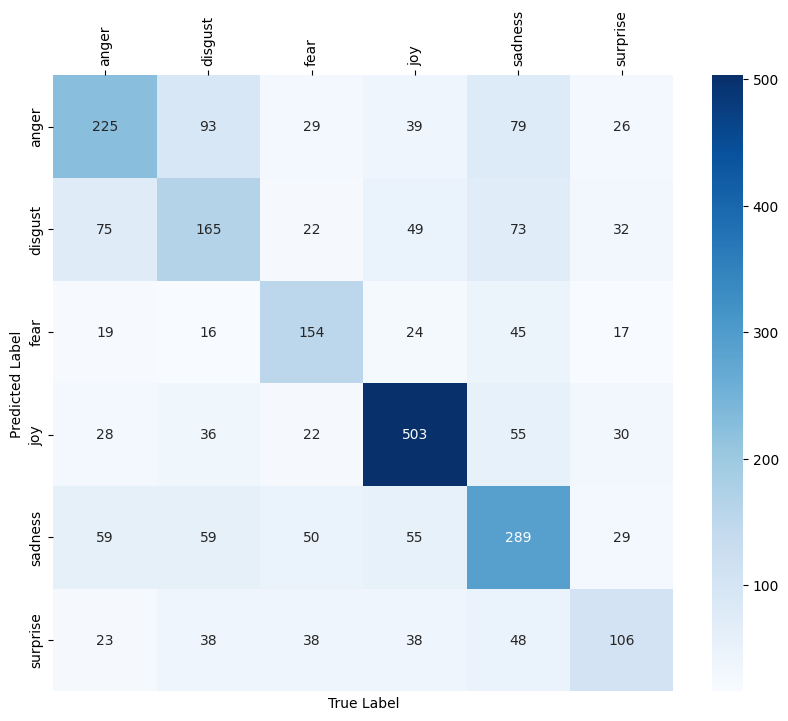

In [99]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [100]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,52.45,45.82,48.91,491.000000
disgust,40.54,39.66,40.10,416.000000
fear,48.89,56.00,52.20,275.000000
joy,71.05,74.63,72.79,674.000000
sadness,49.07,53.42,51.15,541.000000
surprise,44.17,36.43,39.92,291.000000
accuracy,53.65,53.65,53.65,0.536458
macro avg,51.03,50.99,50.85,2688.000000
weighted avg,53.33,53.65,53.35,2688.000000


# **Ensemble Model**

In [118]:
# Perform majority voting with weights
ensemble_outputs = (distil_predictions) + ( mBERT_predictions) + (0.5 * bangla_predictions) + ( roberta_predictions)
ensemble_predictions = torch.argmax(torch.from_numpy(ensemble_outputs), axis=1)

In [119]:
# Get the final ensemble predictions
predictions = ensemble_predictions.tolist()

In [120]:
# Print the predictions
print(predictions)

[3, 2, 2, 3, 3, 1, 3, 3, 5, 4, 1, 0, 2, 3, 4, 4, 2, 0, 1, 0, 3, 3, 5, 3, 1, 3, 5, 0, 3, 3, 3, 3, 1, 2, 0, 2, 1, 1, 1, 1, 4, 4, 0, 4, 1, 0, 3, 5, 3, 0, 3, 3, 4, 3, 3, 0, 4, 2, 2, 3, 3, 2, 0, 1, 3, 1, 4, 0, 2, 1, 4, 3, 3, 0, 3, 1, 1, 3, 1, 4, 4, 1, 5, 5, 0, 0, 2, 0, 4, 3, 3, 4, 0, 3, 1, 4, 3, 5, 4, 0, 3, 2, 1, 0, 5, 4, 5, 5, 3, 3, 4, 3, 4, 0, 4, 4, 1, 4, 3, 4, 1, 4, 5, 2, 3, 3, 1, 1, 3, 3, 4, 3, 1, 1, 3, 4, 0, 3, 1, 0, 5, 4, 3, 4, 1, 4, 4, 3, 4, 4, 3, 3, 4, 1, 3, 3, 4, 2, 5, 3, 4, 3, 3, 4, 0, 2, 0, 5, 5, 1, 3, 0, 4, 0, 5, 4, 1, 4, 2, 4, 3, 4, 1, 4, 1, 4, 3, 4, 3, 5, 2, 3, 4, 4, 4, 3, 4, 3, 0, 5, 4, 1, 0, 3, 5, 2, 2, 0, 3, 3, 3, 4, 3, 3, 5, 4, 3, 2, 3, 4, 2, 3, 5, 4, 0, 2, 3, 0, 0, 0, 1, 2, 4, 3, 1, 3, 3, 2, 4, 4, 3, 4, 5, 4, 0, 4, 0, 4, 0, 0, 4, 4, 2, 0, 4, 1, 4, 1, 3, 3, 4, 2, 3, 4, 4, 3, 3, 1, 3, 2, 0, 0, 3, 1, 4, 1, 3, 3, 0, 3, 3, 4, 3, 4, 4, 3, 4, 5, 3, 4, 2, 0, 0, 3, 1, 3, 2, 0, 4, 3, 3, 3, 4, 5, 2, 3, 3, 0, 2, 4, 4, 2, 0, 3, 0, 0, 1, 1, 3, 3, 0, 1, 1, 0, 2, 3, 4, 2, 4, 3, 3, 0, 4, 

In [121]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in ensemble_predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [122]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.18266369047619047


<Axes: >

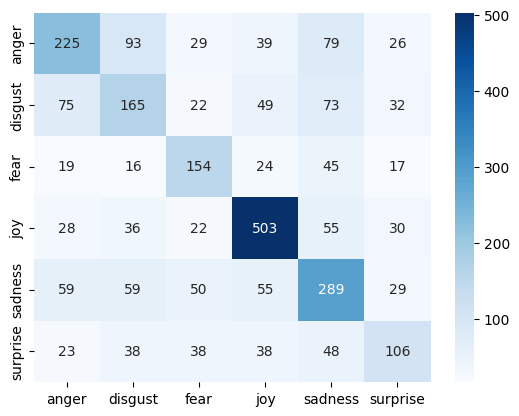

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Blues", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

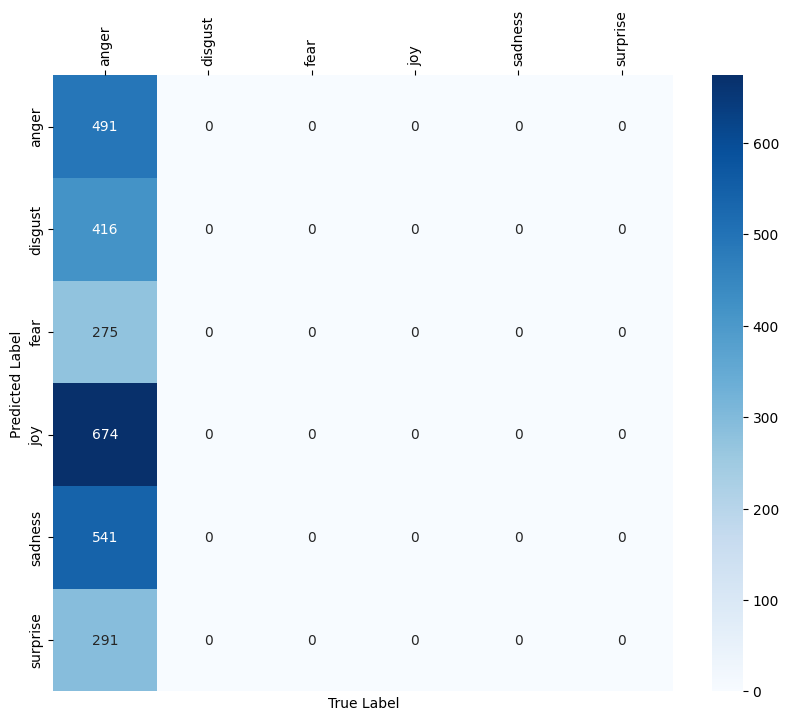

In [116]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Blues", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [117]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
anger,18.27,100.00,30.89,491.000000
disgust,0.00,0.00,0.00,416.000000
fear,0.00,0.00,0.00,275.000000
joy,0.00,0.00,0.00,674.000000
sadness,0.00,0.00,0.00,541.000000
surprise,0.00,0.00,0.00,291.000000
accuracy,18.27,18.27,18.27,0.182664
macro avg,3.04,16.67,5.15,2688.000000
weighted avg,3.34,18.27,5.64,2688.000000


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(dataset['text'], dataset['encoded_classes'], test_size = 0.2,random_state=42)

In [125]:
from collections import Counter
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def load_model(model_path):
    # Load a trained model and its tokenizer
    model = BertForSequenceClassification.from_pretrained(model_path)
    tokenizer = BertTokenizer.from_pretrained(model_path)
    return model, tokenizer

def predict(model, tokenizer, input_text):
    # Encode input data
    encoded_data_train = tokenizer.batch_encode_plus(
      xtrain,
      add_special_tokens=True,
      return_attention_mask=True,
      max_length=64,
      padding='max_length',
      truncation=True,
      return_tensors='pt'
    )

    encoded_data_test = tokenizer.batch_encode_plus(
      xtest,
      add_special_tokens=True,
      return_attention_mask=True,
      max_length=64,
      padding='max_length',
      truncation=True,
      return_tensors='pt'
    )

    # Get model outputs
    input_ids_train = encoded_data_train['input_ids']
    attention_masks_train = encoded_data_train['attention_mask']
    labels_train = torch.tensor(ytrain.values)


    input_ids_test = encoded_data_test['input_ids']
    attention_masks_test = encoded_data_test['attention_mask']
    labels_test = torch.tensor(ytest.values)
    with torch.no_grad():
        outputs = model(input_ids_train, attention_mask=attention_masks_train)

    # Get predicted class from the model outputs
    _, predicted_class = torch.max(outputs[0], dim=1)

    return predicted_class.item()

# Path to your trained BERT models
model_paths = ['sagorsarker/bangla-bert-base', 'distilbert-base-uncased', 'bert-base-multilingual-cased', 'cardiffnlp/twitter-roberta-base-emotion']

# Load models and their tokenizers
models_and_tokenizers = [load_model(model_path) for model_path in model_paths]

# Sample input text for prediction
input_text = "Replace this with your input text"

# Collect predictions from each model
predictions = [predict(model, tokenizer, input_text) for model, tokenizer in models_and_tokenizers]

# Get the most common prediction among all models (majority vote)
most_common_prediction = Counter(predictions).most_common(1)[0][0]

print(f"Ensemble prediction: {most_common_prediction}")


Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-ber

TypeError: ignored